In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

from keras.models import Model, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,accuracy_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import LabelEncoder,normalize,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from logitboost import LogitBoost
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from data_exploration import explore
from feature_engineering import transformation

# Outstanding Ploting

In [2]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.facecolor'] = (0.9,0.9,0.9)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'w'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 22

## Preprocessing (transformation/scaling)

In [3]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [4]:
combined_data = pd.concat([train, test]).drop(['id'],axis=1)

In [5]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  din

In [6]:
combined_data.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0   252  ...                 1               1             0           0   
1    62  ...                 1               2             0           0   
2    62  ...                 1               3             0           0   
3    62  ...                 1               3             1           1   
4   254  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 44 columns]

In [7]:
combined_data.tail()

dur proto service state  spkts  dpkts  sbytes  dbytes  \
82327  0.000005   udp       -   INT      2      0     104       0   
82328  1.106101   tcp       -   FIN     20      8   18062     354   
82329  0.000000   arp       -   INT      1      0      46       0   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
82327  200000.005100   254  ...                 1               2   
82328      24.410067   254  ...                 1               1   
82329       0.000000     0  ...                 1               1   
82330       0.000000     0  ...                 1               1   
82331  111111.107200   254  ...                 1               1   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
82327             0           0                 0           2           1   
82328             0           0                 0           3           2   
82329             0           0                 0           1           1   
82330             0           0                 0           1           1   
82331             0           0                 0           1           1   

       is_sm_ips_ports  attack_cat  label  
82327                0      Normal      0  
82328                0      Normal      0  
82329                1      Normal      0  
82330                1      Normal      0  
82331                0      Normal      0  

[5 rows x 44 columns]

# Exploratory Data Analysis

<Figure size 2160x1080 with 0 Axes>

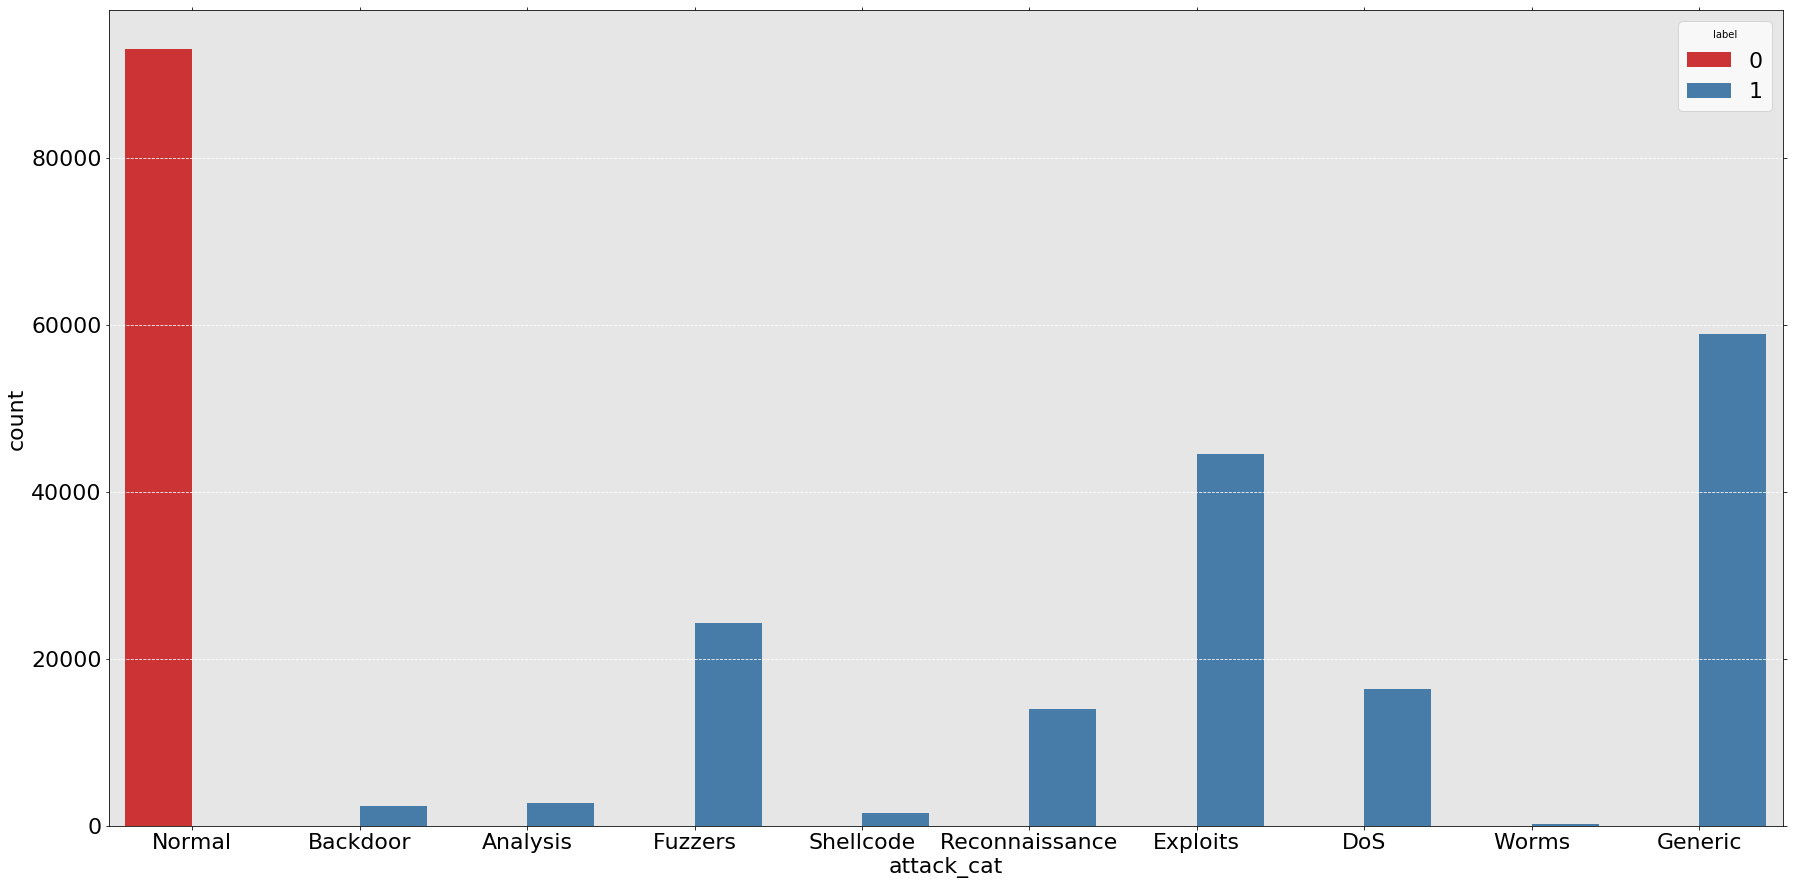

In [8]:
plt.figure(figsize=(30,15))
sns.countplot(x='attack_cat',hue='label',data=combined_data,palette='Set1')

# Object --> Numerical Value (int 32)

In [9]:
tmp = train.where(train['attack_cat'] == "Normal").dropna()
len(tmp['attack_cat'])/len(train['attack_cat'])

0.3193776697977085

In [10]:
tmp = test.where(test['attack_cat'] == "Normal").dropna()
len(tmp['attack_cat'])/len(test['attack_cat'])

0.44939999028324346

In [11]:
le1 = LabelEncoder()
le = LabelEncoder()

vector = combined_data['attack_cat']

print("attack cat:", set(list(vector))) # use print to make it print on single line 

combined_data['attack_cat'] = le1.fit_transform(vector)
combined_data['proto'] = le.fit_transform(combined_data['proto'])
combined_data['service'] = le.fit_transform(combined_data['service'])
combined_data['state'] = le.fit_transform(combined_data['state'])

vector = combined_data['attack_cat']
print('\nDescribing attack_type: ')
print("min", vector.min())
print("max", vector.max())
print("mode",vector.mode())

attack cat: {'Shellcode', 'Normal', 'Reconnaissance', 'Generic', 'DoS', 'Worms', 'Backdoor', 'Exploits', 'Analysis', 'Fuzzers'}

Describing attack_type: 
min 0
max 9
mode 0    6
dtype: int32


In [12]:
print("mode", len(np.where(vector.values==6)[0])/len(vector))

mode 0.3609225646458884


# Attack Catagories

In [13]:
le1.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [14]:
combined_data.tail()

dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
82327  0.000005    119        0      5      2      0     104       0   
82328  1.106101    113        0      4     20      8   18062     354   
82329  0.000000      6        0      5      1      0      46       0   
82330  0.000000      6        0      5      1      0      46       0   
82331  0.000009    119        0      5      2      0     104       0   

                rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
82327  200000.005100   254  ...                 1               2   
82328      24.410067   254  ...                 1               1   
82329       0.000000     0  ...                 1               1   
82330       0.000000     0  ...                 1               1   
82331  111111.107200   254  ...                 1               1   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
82327             0           0                 0           2           1   
82328             0           0                 0           3           2   
82329             0           0                 0           1           1   
82330             0           0                 0           1           1   
82331             0           0                 0           1           1   

       is_sm_ips_ports  attack_cat  label  
82327                0           6      0  
82328                0           6      0  
82329                1           6      0  
82330                1           6      0  
82331                0           6      0  

[5 rows x 44 columns]

In [15]:
attack = ['attack_cat']

In [19]:
fd = pd.get_dummies(combined_data,columns=attack,drop_first=False)

In [20]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  int32  
 2   service            257673 non-null  int32  
 3   state              257673 non-null  int32  
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  din

In [21]:
fd.describe()

dur          proto        service          state  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean        1.246715     110.136025       1.555902       4.341468   
std         5.974305      21.349900       2.245945       0.887420   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000008     113.000000       0.000000       4.000000   
50%         0.004285     113.000000       0.000000       4.000000   
75%         0.685777     119.000000       2.000000       5.000000   
max        59.999989     132.000000      12.000000      10.000000   

               spkts          dpkts        sbytes        dbytes          rate  \
count  257673.000000  257673.000000  2.576730e+05  2.576730e+05  2.576730e+05   
mean       19.777144      18.514703  8.572952e+03  1.438729e+04  9.125391e+04   
std       135.947152     111.985965  1.737739e+05  1.461993e+05  1.603446e+05   
min         1.000000       0.000000  2.400000e+01  0.000000e+00  0.000000e+00   
25%         2.000000       0.000000  1.140000e+02  0.000000e+00  3.078928e+01   
50%         4.000000       2.000000  5.280000e+02  1.780000e+02  2.955665e+03   
75%        12.000000      10.000000  1.362000e+03  1.064000e+03  1.250000e+05   
max     10646.000000   11018.000000  1.435577e+07  1.465753e+07  1.000000e+06   

                sttl  ...   attack_cat_0   attack_cat_1   attack_cat_2  \
count  257673.000000  ...  257673.000000  257673.000000  257673.000000   
mean      180.000931  ...       0.010389       0.009039       0.063464   
std       102.488268  ...       0.101396       0.094641       0.243796   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%        62.000000  ...       0.000000       0.000000       0.000000   
50%       254.000000  ...       0.000000       0.000000       0.000000   
75%       254.000000  ...       0.000000       0.000000       0.000000   
max       255.000000  ...       1.000000       1.000000       1.000000   

        attack_cat_3   attack_cat_4   attack_cat_5   attack_cat_6  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean        0.172797       0.094096       0.228472       0.360923   
std         0.378072       0.291963       0.419849       0.480269   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

        attack_cat_7   attack_cat_8   attack_cat_9  
count  257673.000000  257673.000000  257673.000000  
mean        0.054282       0.005864       0.000675  
std         0.226574       0.076352       0.025977  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 53 columns]

In [22]:
fd.head()

dur  proto  service  state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478    113        0      4      6      4     258     172  74.087490   
1  0.649902    113        0      4     14     38     734   42014  78.473372   
2  1.623129    113        0      4      8     16     364   13186  14.170161   
3  1.681642    113        3      4     12     12     628     770  13.677108   
4  0.449454    113        0      4     10      6     534     268  33.373826   

   sttl  ...  attack_cat_0  attack_cat_1  attack_cat_2  attack_cat_3  \
0   252  ...             0             0             0             0   
1    62  ...             0             0             0             0   
2    62  ...             0             0             0             0   
3    62  ...             0             0             0             0   
4   254  ...             0             0             0             0   

   attack_cat_4  attack_cat_5  attack_cat_6  attack_cat_7  attack_cat_8  \
0             0             0             1             0             0   
1             0             0             1             0             0   
2             0             0             1             0             0   
3             0             0             1             0             0   
4             0             0             1             0             0   

   attack_cat_9  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 53 columns]

# Feature Extraction

In [23]:
# select least correlated
corr_matrix = combined_data.corr().abs().sort_values('attack_cat')
# tmp.head(10) # to view CORR matrix 
leastCorrelated = corr_matrix['attack_cat'].nsmallest(10)
leastCorrelated = list(leastCorrelated.index)

# select least correlated
leastSTD =  combined_data.std().to_frame().nsmallest(5, columns=0)
leastSTD = list(leastSTD.transpose().columns)
#tmp = tmp.append('num_outbound_cmds')  # might not work...
featureElimination = set(leastCorrelated + leastSTD)
len(featureElimination)
featureElimination

14

{'ackdat',
 'ct_dst_sport_ltm',
 'ct_ftp_cmd',
 'dbytes',
 'dinpkt',
 'djit',
 'dloss',
 'dpkts',
 'is_ftp_login',
 'response_body_len',
 'sjit',
 'spkts',
 'synack',
 'tcprtt'}

In [70]:
# select least correlated
corr_matrix = fd.corr().abs().sort_values('attack_cat_DoS')
# tmp.head(10) # to view CORR matrix 
leastCorrelated = corr_matrix['attack_cat_DoS'].nsmallest(10)
leastCorrelated = list(leastCorrelated.index)

# select least correlated
leastSTD =  fd.std().to_frame().nsmallest(5, columns=0)
leastSTD = list(leastSTD.transpose().columns)
#tmp = tmp.append('num_outbound_cmds')  # might not work...
featureElimination = set(leastCorrelated + leastSTD)
len(featureElimination)
featureElimination

14

{'ackdat',
 'attack_cat_Shellcode',
 'attack_cat_Worms',
 'ct_flw_http_mthd',
 'dbytes',
 'dloss',
 'dpkts',
 'response_body_len',
 'sloss',
 'smean',
 'spkts',
 'synack',
 'tcprtt',
 'trans_depth'}

In [24]:
combined_data_reduced = combined_data.drop(featureElimination,axis=1)
combined_data.shape
combined_data_reduced.shape

(257673, 44)

(257673, 30)

In [14]:
combined_data_reduced=combined_data.loc[:,['dur',
                                         'proto',
                                         'service',
                                         'state',
                                         'spkts',
                                         'dpkts',
                                         'sbytes',
                                         'dbytes',
                                         'sinpkt',
                                         'ct_srv_src',
                                         'ct_dst_src_ltm',
                                         'attack_cat',
                                         'label']]
combined_data.shape
combined_data_reduced.shape

(257673, 44)

(257673, 13)

In [78]:
combined_data_reduced = fd.drop(featureElimination,axis=1)
fd.shape
combined_data_reduced.shape

(257673, 52)

(257673, 38)

In [25]:
combined_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dur               257673 non-null  float64
 1   proto             257673 non-null  int32  
 2   service           257673 non-null  int32  
 3   state             257673 non-null  int32  
 4   sbytes            257673 non-null  int64  
 5   rate              257673 non-null  float64
 6   sttl              257673 non-null  int64  
 7   dttl              257673 non-null  int64  
 8   sload             257673 non-null  float64
 9   dload             257673 non-null  float64
 10  sloss             257673 non-null  int64  
 11  sinpkt            257673 non-null  float64
 12  swin              257673 non-null  int64  
 13  stcpb             257673 non-null  int64  
 14  dtcpb             257673 non-null  int64  
 15  dwin              257673 non-null  int64  
 16  smean             257

In [26]:
combined_data_reduced.head()

dur  proto  service  state  sbytes       rate  sttl  dttl  \
0  0.121478    113        0      4     258  74.087490   252   254   
1  0.649902    113        0      4     734  78.473372    62   252   
2  1.623129    113        0      4     364  14.170161    62   252   
3  1.681642    113        3      4     628  13.677108    62   252   
4  0.449454    113        0      4     534  33.373826   254   252   

          sload          dload  ...  ct_state_ttl  ct_dst_ltm  \
0  14158.942380    8495.365234  ...             0           1   
1   8395.112305  503571.312500  ...             1           1   
2   1572.271851   60929.230470  ...             1           2   
3   2740.178955    3358.622070  ...             1           2   
4   8561.499023    3987.059814  ...             1           2   

   ct_src_dport_ltm  ct_dst_src_ltm  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 1               1                 0           1           1   
1                 1               2                 0           1           6   
2                 1               3                 0           2           6   
3                 1               3                 0           2           1   
4                 2              40                 0           2          39   

   is_sm_ips_ports  attack_cat  label  
0                0           6      0  
1                0           6      0  
2                0           6      0  
3                0           6      0  
4                0           6      0  

[5 rows x 30 columns]

In [27]:
combined_data_reduced.tail()

dur  proto  service  state  sbytes           rate  sttl  dttl  \
82327  0.000005    119        0      5     104  200000.005100   254     0   
82328  1.106101    113        0      4   18062      24.410067   254   252   
82329  0.000000      6        0      5      46       0.000000     0     0   
82330  0.000000      6        0      5      46       0.000000     0     0   
82331  0.000009    119        0      5     104  111111.107200   254     0   

              sload        dload  ...  ct_state_ttl  ct_dst_ltm  \
82327  8.320000e+07     0.000000  ...             2           2   
82328  1.241044e+05  2242.109863  ...             1           2   
82329  0.000000e+00     0.000000  ...             2           1   
82330  0.000000e+00     0.000000  ...             2           1   
82331  4.622222e+07     0.000000  ...             2           1   

       ct_src_dport_ltm  ct_dst_src_ltm  ct_flw_http_mthd  ct_src_ltm  \
82327                 1               2                 0           2   
82328                 1               1                 0           3   
82329                 1               1                 0           1   
82330                 1               1                 0           1   
82331                 1               1                 0           1   

       ct_srv_dst  is_sm_ips_ports  attack_cat  label  
82327           1                0           6      0  
82328           2                0           6      0  
82329           1                1           6      0  
82330           1                1           6      0  
82331           1                0           6      0  

[5 rows x 30 columns]

# Correlation Analysis

In [28]:
corr = combined_data_reduced.corr()

In [29]:
corr.head()

dur     proto   service     state    sbytes      rate      sttl  \
dur      1.000000 -0.121735 -0.006060  0.086083  0.204422 -0.118622  0.008617   
proto   -0.121735  1.000000  0.160227 -0.155382  0.005081  0.012864  0.054950   
service -0.006060  0.160227  1.000000 -0.122723  0.096717 -0.124198 -0.286251   
state    0.086083 -0.155382 -0.122723  1.000000 -0.044936  0.437391  0.580814   
sbytes   0.204422  0.005081  0.096717 -0.044936  1.000000 -0.027353 -0.019939   

             dttl     sload     dload  ...  ct_state_ttl  ct_dst_ltm  \
dur      0.053580 -0.079202 -0.049026  ...      0.156859   -0.080883   
proto    0.104765  0.005083  0.040944  ...     -0.136473    0.174752   
service  0.222648 -0.154959 -0.104082  ...     -0.196998    0.054198   
state   -0.393581  0.288101 -0.140874  ...      0.717075    0.318613   
sbytes   0.058397 -0.017320 -0.007372  ...     -0.010485   -0.025157   

         ct_src_dport_ltm  ct_dst_src_ltm  ct_flw_http_mthd  ct_src_ltm  \
dur             -0.090267       -0.090921          0.023299   -0.079126   
proto            0.159938        0.161704          0.025970    0.155220   
service          0.047893        0.005433          0.286157    0.030642   
state            0.348906        0.413561         -0.075712    0.317914   
sbytes          -0.024496       -0.029291         -0.002900   -0.025494   

         ct_srv_dst  is_sm_ips_ports  attack_cat     label  
dur       -0.107793         0.034025   -0.091189  0.029096  
proto      0.183820        -0.585964    0.183783  0.008023  
service   -0.042140        -0.083364   -0.073654  0.073552  
state      0.382398         0.089740   -0.224725  0.462972  
sbytes    -0.033095        -0.005903   -0.041092  0.019376  

[5 rows x 30 columns]

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

<Figure size 1152x720 with 0 Axes>

# X & Y Selection

In [31]:
data_x = combined_data_reduced.drop(['attack_cat','label'], axis=1) # droped label
data_y = combined_data_reduced.loc[:,['label']]

In [19]:
data_x = combined_data_reduced.drop(['attack_cat','label'], axis=1) # droped label
data_y = combined_data_reduced.loc[:,['attack_cat']]

In [82]:
data_x = combined_data_reduced.drop(['attack_cat_DoS','label'], axis=1) # droped label
data_y = combined_data_reduced.loc[:,['attack_cat_DoS']]

In [32]:
data_x.head()

dur  proto  service  state  sbytes       rate  sttl  dttl  \
0  0.121478    113        0      4     258  74.087490   252   254   
1  0.649902    113        0      4     734  78.473372    62   252   
2  1.623129    113        0      4     364  14.170161    62   252   
3  1.681642    113        3      4     628  13.677108    62   252   
4  0.449454    113        0      4     534  33.373826   254   252   

          sload          dload  ...  trans_depth  ct_srv_src  ct_state_ttl  \
0  14158.942380    8495.365234  ...            0           1             0   
1   8395.112305  503571.312500  ...            0          43             1   
2   1572.271851   60929.230470  ...            0           7             1   
3   2740.178955    3358.622070  ...            0           1             1   
4   8561.499023    3987.059814  ...            0          43             1   

   ct_dst_ltm  ct_src_dport_ltm  ct_dst_src_ltm  ct_flw_http_mthd  ct_src_ltm  \
0           1                 1               1                 0           1   
1           1                 1               2                 0           1   
2           2                 1               3                 0           2   
3           2                 1               3                 0           2   
4           2                 2              40                 0           2   

   ct_srv_dst  is_sm_ips_ports  
0           1                0  
1           6                0  
2           6                0  
3           1                0  
4          39                0  

[5 rows x 28 columns]

In [33]:
data_y.tail()

label
82327      0
82328      0
82329      0
82330      0
82331      0

# Balanced Data Check

In [34]:
combined_data_reduced.isnull().values.any()

False

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'USNW_NB-15')

([<matplotlib.axis.XTick at 0x26267e0bec8>,
 <a list of 2 Text xticklabel objects>)

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

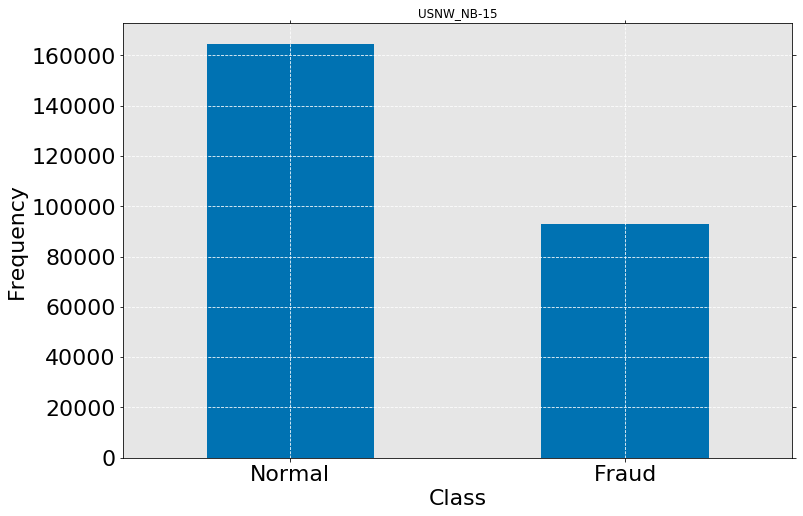

In [36]:
plt.figure(figsize=(12,8))

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(combined_data_reduced['label'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("USNW_NB-15")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [38]:
## Get the Fraud and the normal dataset 

fraud = combined_data_reduced[combined_data_reduced['label']==0]

normal = combined_data_reduced[combined_data_reduced['label']==1]

In [39]:
print(fraud.shape,normal.shape)

(93000, 30) (164673, 30)


In [40]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [41]:
X = data_x
y = data_y

In [42]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [43]:
X_res.shape,y_res.shape

((310684, 28), (310684, 1))

In [44]:
cmb = pd.concat([X_res,y_res])

In [45]:
cmb.isnull().values.any()

True

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'USNW_NB-15')

([<matplotlib.axis.XTick at 0x26204714788>,
 <a list of 2 Text xticklabel objects>)

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

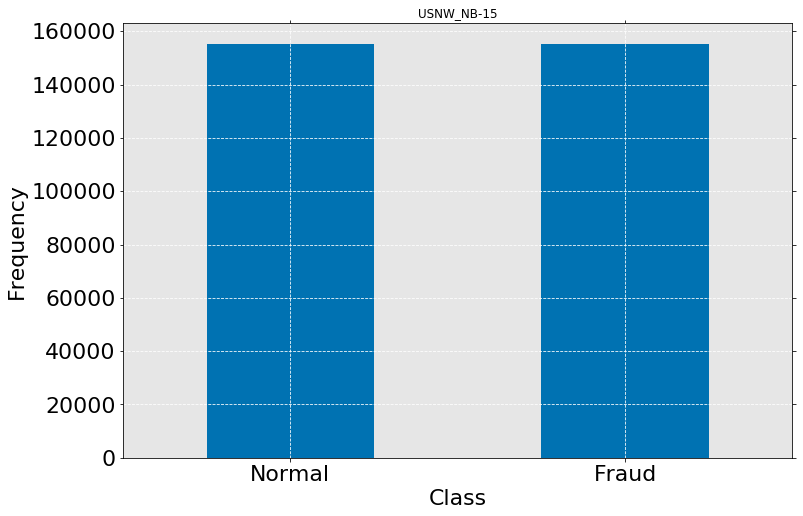

In [46]:
plt.figure(figsize=(12,8))

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(cmb['label'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("USNW_NB-15")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [24]:
## Get the Fraud and the normal dataset 

a = combined_data_reduced[combined_data_reduced['attack_cat']==0]

b = combined_data_reduced[combined_data_reduced['attack_cat']==1]

c = combined_data_reduced[combined_data_reduced['attack_cat']==2]

d = combined_data_reduced[combined_data_reduced['attack_cat']==3]

e = combined_data_reduced[combined_data_reduced['attack_cat']==4]

f = combined_data_reduced[combined_data_reduced['attack_cat']==5]

g = combined_data_reduced[combined_data_reduced['attack_cat']==6]

h = combined_data_reduced[combined_data_reduced['attack_cat']==7]

i = combined_data_reduced[combined_data_reduced['attack_cat']==8]

j = combined_data_reduced[combined_data_reduced['attack_cat']==9]

In [29]:
print("Analysis--------->",a.shape)
print("Backdoor--------->",b.shape)
print("DoS-------------->",c.shape)
print("Exploits--------->",d.shape)
print("Fuzzers---------->",e.shape)
print("Generic---------->",f.shape)
print("Normal----------->",g.shape)
print("Reconnaissance--->",h.shape)
print("Shellcode-------->",i.shape)
print("Worms------------>",j.shape)

Analysis---------> (2677, 30)
Backdoor---------> (2329, 30)
DoS--------------> (16353, 30)
Exploits---------> (44525, 30)
Fuzzers----------> (24246, 30)
Generic----------> (58871, 30)
Normal-----------> (93000, 30)
Reconnaissance---> (13987, 30)
Shellcode--------> (1511, 30)
Worms------------> (174, 30)


In [30]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [32]:
X = data_x
y = data_y

In [33]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [34]:
X_res.shape,y_res.shape

((813308, 28), (813308, 1))

In [35]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'attack_cat': 1})
Resampled dataset shape Counter({'attack_cat': 1})


In [36]:
cmb = pd.concat([X_res,y_res])

In [37]:
cmb.head()

dur  proto  service  state  sbytes       rate   sttl   dttl  \
0  0.121478  113.0      0.0    4.0   258.0  74.087490  252.0  254.0   
1  0.649902  113.0      0.0    4.0   734.0  78.473372   62.0  252.0   
2  0.380537  113.0      0.0    4.0   534.0  39.417980  254.0  252.0   
3  0.637109  113.0      0.0    4.0   534.0  26.683033  254.0  252.0   
4  0.521584  113.0      0.0    4.0   534.0  32.593026  254.0  252.0   

          sload          dload  ...  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0  14158.942380    8495.365234  ...         1.0           0.0         1.0   
1   8395.112305  503571.312500  ...        43.0           1.0         1.0   
2  10112.025390    4709.134766  ...        43.0           1.0         2.0   
3   6039.783203    3892.583740  ...        43.0           1.0         1.0   
4   7377.527344    4754.747070  ...        43.0           1.0         3.0   

   ct_src_dport_ltm  ct_dst_src_ltm  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0               1.0             1.0               0.0         1.0         1.0   
1               1.0             2.0               0.0         1.0         6.0   
2               2.0            40.0               0.0         2.0        39.0   
3               1.0            40.0               0.0         1.0        39.0   
4               3.0            40.0               0.0         3.0        39.0   

   is_sm_ips_ports  attack_cat  
0              0.0         NaN  
1              0.0         NaN  
2              0.0         NaN  
3              0.0         NaN  
4              0.0         NaN  

[5 rows x 29 columns]

In [38]:
cmb.isnull().values.any()

True

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'USNW_NB-15')

([<matplotlib.axis.XTick at 0x1b03626d048>,
 <a list of 2 Text xticklabel objects>)

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

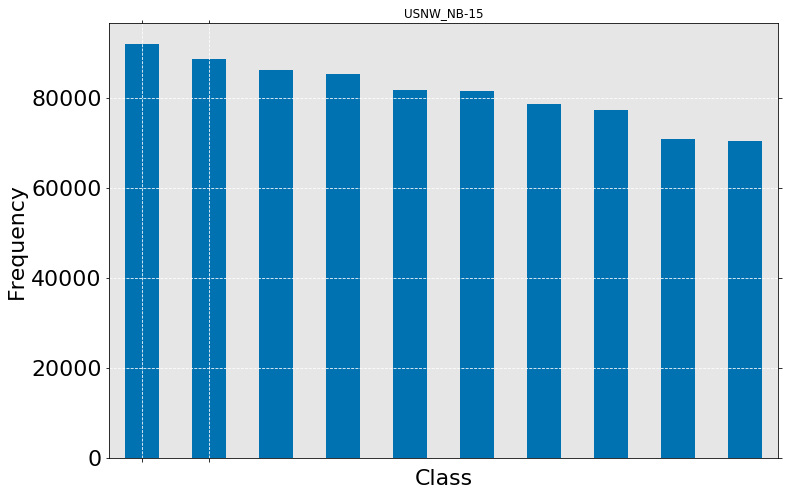

In [44]:
plt.figure(figsize=(12,8))

LABELS = ["","","2","3","4","5","6","7","8","9"]

count_classes = pd.value_counts(cmb['attack_cat'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("USNW_NB-15")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [42]:
a = cmb[cmb['attack_cat']==0]
b = cmb[cmb['attack_cat']==0]
c = cmb[cmb['attack_cat']==0]
d = cmb[cmb['attack_cat']==0]
e = cmb[cmb['attack_cat']==0]
f = cmb[cmb['attack_cat']==0]
g = cmb[cmb['attack_cat']==0]
h = cmb[cmb['attack_cat']==0]
i = cmb[cmb['attack_cat']==0]
j = cmb[cmb['attack_cat']==0]

In [43]:
print("Analysis--------->",a.shape)
print("Backdoor--------->",b.shape)
print("DoS-------------->",c.shape)
print("Exploits--------->",d.shape)
print("Fuzzers---------->",e.shape)
print("Generic---------->",f.shape)
print("Normal----------->",g.shape)
print("Reconnaissance--->",h.shape)
print("Shellcode-------->",i.shape)
print("Worms------------>",j.shape)

Analysis---------> (70980, 29)
Backdoor---------> (70980, 29)
DoS--------------> (70980, 29)
Exploits---------> (70980, 29)
Fuzzers----------> (70980, 29)
Generic----------> (70980, 29)
Normal-----------> (70980, 29)
Reconnaissance---> (70980, 29)
Shellcode--------> (70980, 29)
Worms------------> (70980, 29)


# Train - Test - Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.90, random_state=42) # TODO

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.90, random_state=42) # TODO

In [48]:
print(X_train)

              dur  proto  service  state  sbytes           rate  sttl  dttl  \
173636   0.549454    113        5      4     934      27.299830   254   252   
232903  15.876373    119        0      5    2130       0.188960   254     0   
103278   0.000004     38        0      5     200  250000.000600   254     0   
298901   0.000006    113        0      7      90  166666.660800   254     0   
87684    1.849222    113        4      4     364       9.193056    62   252   
...           ...    ...      ...    ...     ...            ...   ...   ...   
119879   0.000009    119        2      5     114  111111.107200   254     0   
259178   0.637065    113        2      2     907      18.992090    62   252   
131932   0.000009    119        2      5     114  111111.107200   254     0   
146867   0.000007    120        0      5     200  142857.140900   254     0   
121958   0.000003    119        2      5     114  333333.321500   254     0   

               sload         dload  ...  trans_dept

# Feature Scaling

In [49]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [50]:
print(X_train)

[[-0.11127301  0.14136449  1.65331912 ... -0.55111771 -0.73305396
  -0.14421658]
 [ 2.54672414  0.41364952 -0.67784418 ... -0.17078381  1.12275768
  -0.14421658]
 [-0.20655874 -3.26219834 -0.67784418 ... -0.55111771 -0.24468248
  -0.14421658]
 ...
 [-0.20655787  0.41364952  0.25462114 ...  1.35055178  1.51345487
  -0.14421658]
 [-0.20655822  0.45903036 -0.67784418 ... -0.42433974 -0.34235677
  -0.14421658]
 [-0.20655891  0.41364952  0.25462114 ...  2.36477551  1.61112916
  -0.14421658]]


In [51]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(31068, 28)

(31068, 1)

(279616, 28)

(279616, 1)

# Overfitting vs Underfitting 

In [101]:
clf_1 = RandomForestClassifier(n_estimators=25, bootstrap=True, random_state=1)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 10

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [102]:
clf_1_pred = clf_1.predict(X_test)

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, clf_1_pred)*100,"%")

Accuracy: 93.54911041542694 %


In [104]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure(figsize=(18,10))
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score',marker='.')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score',marker='.')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [105]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    #ax.set_ylim(-1.00, -0.90)
    ax.set_ylim(-1.00, -0.90)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    #ax.text(9, -0.94, 'Overfitting', fontsize=22)
    #ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

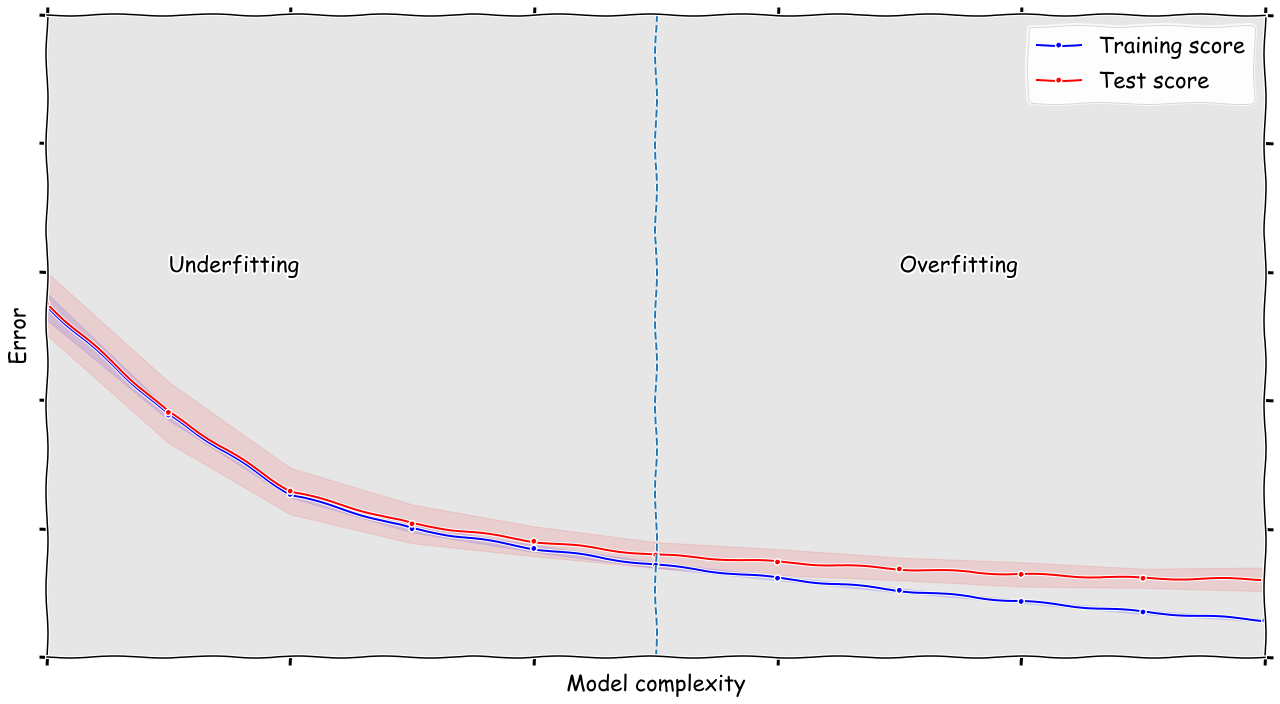

In [107]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))

# Naive Bayes Classifier

In [52]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [53]:
# Predicting the Test set results
NB_pred = NB_classifier.predict(X_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, NB_pred)*100,"%")

Accuracy: 82.14622911421378 %


# Support Vector Machine

In [55]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

In [56]:
#Train the model using the training sets
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
#Predict the response for test dataset
svm_pred = svm_clf.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred)*100,"%")

Accuracy: 88.74849794003204 %


# Multi Layer Perceptron

In [59]:
MLP_clf = MLPClassifier(random_state=1, max_iter=25).fit(X_train, y_train)

In [60]:
MLP_pred = MLP_clf.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, MLP_pred)*100,"%")

Accuracy: 92.54870965896086 %


# Decision Tree

In [62]:
dtree = DecisionTreeClassifier()

In [63]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
dtree_pred = dtree.predict(X_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred)*100,"%")

Accuracy: 93.53685053788053 %


## Decison Tree - 10-Fold Cross Validation

In [66]:
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.44 %
Standard Deviation: 0.27 %


# Random Forest Classifier

In [115]:
rfc = RandomForestClassifier(n_estimators=100, random_state=10)

In [116]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [117]:
rfc_pred = rfc.predict(X_test)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred)*100,"%")

Accuracy: 95.19233520256351 %


## Random Forest Classifier - 10-Fold Cross Validation

In [119]:
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.00 %
Standard Deviation: 0.33 %


# Ensemble Method

In [54]:
Image(url='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_1_joyt3x.png')

# Different Types of Ensemble

In [55]:
Image(url='https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_2_pu8tu6.png')

# Logit Boost

In [98]:
lboost = LogitBoost(n_estimators=100, random_state=10)
lboost.fit(X_train, y_train)

LogitBoost(n_estimators=100, random_state=10)

In [99]:
LB_train = lboost.predict(X_train)
LB_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, LB_train)
accuracy_test = accuracy_score(y_test, LB_test)

#print('Training accuracy: %.4f' % accuracy_train)
#print('Test accuracy:     %.4f' % accuracy_test)
print('Training accuracy: ' , accuracy_train*100,"%")
print('Test accuracy    : ' , accuracy_test*100,"%")

Training accuracy:  94.03566370542038 %
Test accuracy    :  94.0500543602655 %


In [100]:
report_train = classification_report(y_train, LB_train)
report_test = classification_report(y_test, LB_test)
print('Training\n%s' % report_train)
print('Testing\n%s' % report_test)

Training
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     15562
           1       0.95      0.93      0.94     15506

    accuracy                           0.94     31068
   macro avg       0.94      0.94      0.94     31068
weighted avg       0.94      0.94      0.94     31068

Testing
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    139780
           1       0.95      0.93      0.94    139836

    accuracy                           0.94    279616
   macro avg       0.94      0.94      0.94    279616
weighted avg       0.94      0.94      0.94    279616



In [94]:
report_train = classification_report(y_train, LB_train)
report_test = classification_report(y_test, LB_test)
print('Training\n%s' % report_train)
print('Testing\n%s' % report_test)

Training
              precision    recall  f1-score   support

           0       0.91      0.04      0.07       264
           1       0.86      0.08      0.15       237
           2       0.42      0.21      0.28      1678
           3       0.62      0.86      0.72      4383
           4       0.86      0.84      0.85      2384
           5       1.00      0.97      0.99      5914
           6       1.00      1.00      1.00      9366
           7       0.85      0.78      0.82      1376
           8       0.65      0.50      0.57       144
           9       1.00      0.05      0.09        21

    accuracy                           0.87     25767
   macro avg       0.82      0.53      0.55     25767
weighted avg       0.87      0.87      0.86     25767

Testing
              precision    recall  f1-score   support

           0       0.68      0.06      0.10      2413
           1       0.76      0.06      0.12      2092
           2       0.36      0.19      0.25     14675
       

## Visualizing Accuracy During Boosting

<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Ensemble accuracy during each boosting iteration')

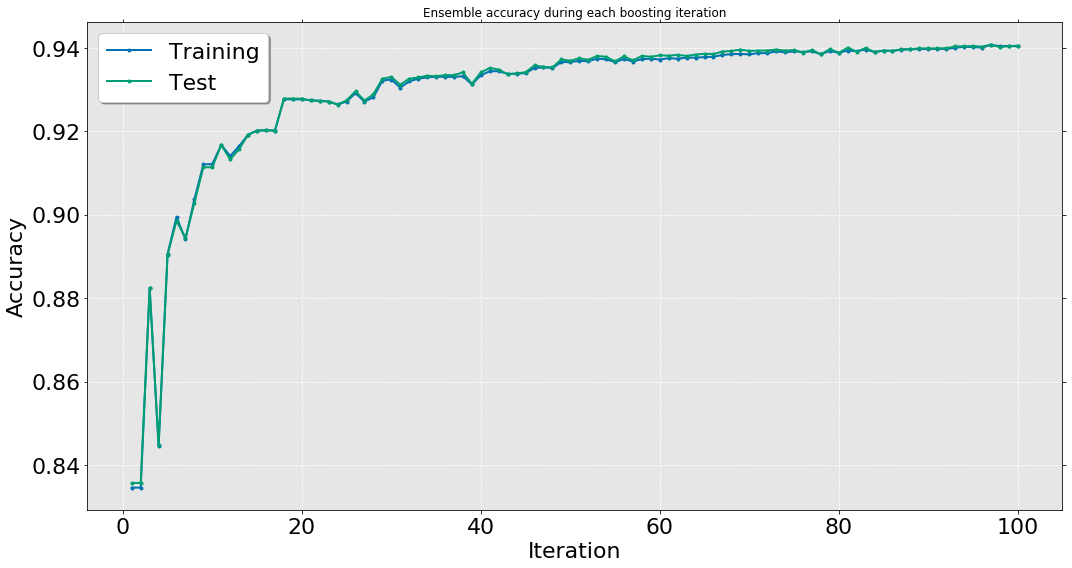

In [101]:
iterations = np.arange(1, lboost.n_estimators + 1)
staged_accuracy_train = list(lboost.staged_score(X_train, y_train))
staged_accuracy_test = list(lboost.staged_score(X_test, y_test))

plt.figure(figsize=(15,8))
plt.plot(iterations, staged_accuracy_train, label='Training', marker='.')
plt.plot(iterations, staged_accuracy_test, label='Test', marker='.')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Ensemble accuracy during each boosting iteration')
plt.legend(loc='best', shadow=True, frameon=True)

plt.tight_layout()
plt.show()
plt.close()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Ensemble accuracy during each boosting iteration')

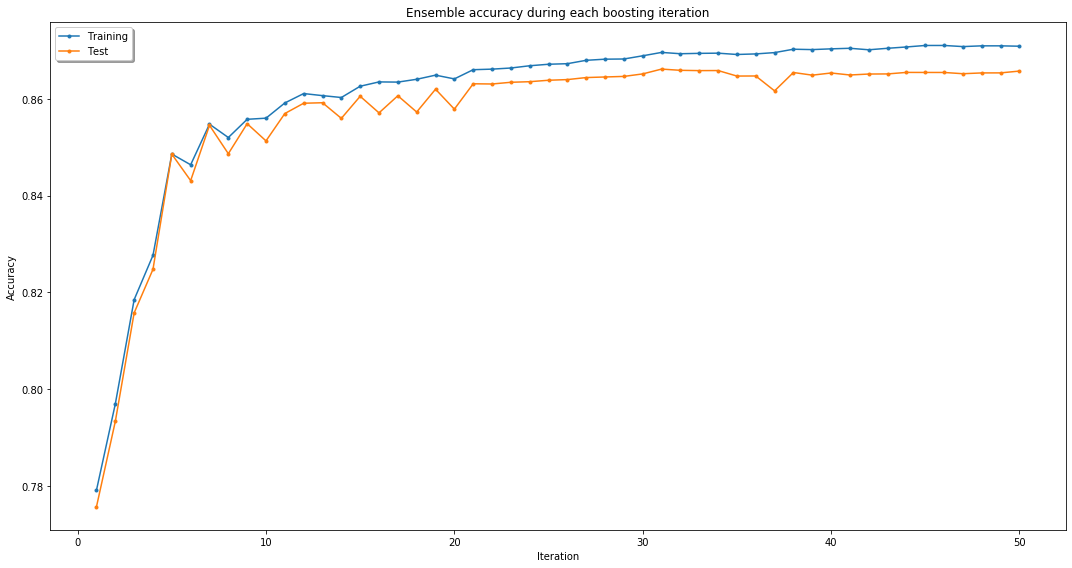

In [95]:
iterations = np.arange(1, lboost.n_estimators + 1)
staged_accuracy_train = list(lboost.staged_score(X_train, y_train))
staged_accuracy_test = list(lboost.staged_score(X_test, y_test))

plt.figure(figsize=(15,8))
plt.plot(iterations, staged_accuracy_train, label='Training', marker='.')
plt.plot(iterations, staged_accuracy_test, label='Test', marker='.')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Ensemble accuracy during each boosting iteration')
plt.legend(loc='best', shadow=True, frameon=True)

plt.tight_layout()
plt.show()
plt.close()

# Random Forest + Logit Boost + Ada Boost --- Ensemble -- 10 Fold Cross Validation

In [102]:
X = X_train
y = y_train

In [120]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=10)
clf2 = LogitBoost(n_estimators=200, random_state=15)
clf3 = AdaBoostClassifier(n_estimators=200, random_state=10)

In [106]:
eclf = VotingClassifier(
        estimators=[('rf', clf1), ('lb', clf2), ('ad', clf3)],
        voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'Logit Boost', 'Ada Boost', 'Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
        print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.9490 (+/- 0.00) [Random Forest]
Accuracy: 0.9373 (+/- 0.00) [Logit Boost]
Accuracy: 0.9396 (+/- 0.00) [Ada Boost]
Accuracy: 0.9437 (+/- 0.00) [Ensemble]


In [121]:
eclf = VotingClassifier(
        estimators=[('rf', clf1), ('lb', clf2)],
        voting='hard')

for clf, label in zip([clf1, clf2, eclf], ['Random Forest', 'Logit Boost', 'Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
        print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.9500 (+/- 0.00) [Random Forest]
Accuracy: 0.9402 (+/- 0.01) [Logit Boost]
Accuracy: 0.9461 (+/- 0.01) [Ensemble]


In [99]:
eclf = VotingClassifier(
        estimators=[('rf', clf1), ('lb', clf2)],
        voting='hard')

for clf, label in zip([clf1, clf2, eclf], ['Random Forest', 'Logit Boost', 'Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
        print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.8606 (+/- 0.00) [Random Forest]
Accuracy: 0.8660 (+/- 0.01) [Logit Boost]
Accuracy: 0.8618 (+/- 0.01) [Ensemble]


# Graphical Representation of --> 

# Random-Forest + AdaBoost + LogitBoost --> Ensemble

In [97]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('lb', clf2), ('ad', clf3)],
                        voting='soft',
                        weights=[5, 1, 1])

In [98]:
# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

In [99]:
# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

[Text(0, 0, 'RandomForestClassifier\nweight 5'),
 Text(0, 0, 'LogitBoost\nweight 1'),
 Text(0, 0, 'AdaBoost\nweight 1'),
 Text(0, 0, 'Ensemble Classifier\n(average probabilities)')]

(0, 1)

Text(0.5, 1.0, 'Class probabilities for sample 1 by different classifiers')

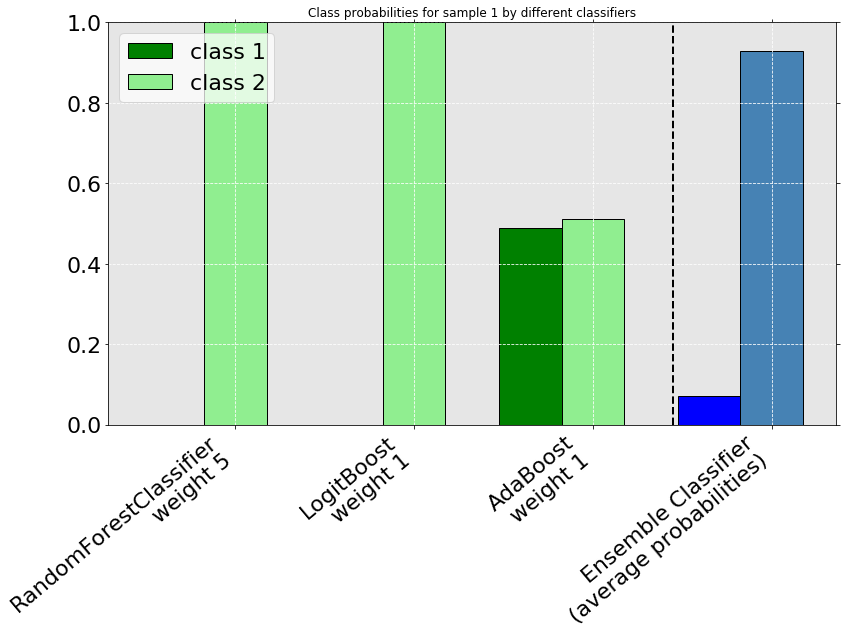

In [100]:
# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig,ax = plt.subplots(figsize=(12,9))

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['RandomForestClassifier\nweight 5',
                    'LogitBoost\nweight 1',
                    'AdaBoost\nweight 1',
                    'Ensemble Classifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()